<a href="https://colab.research.google.com/github/Lguilerme/Treinamento-Python/blob/main/Exerc%C3%ADcio_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Manipulação de dados (DataFrames)
import pandas as pd
#Operações numéricas e vetoriais
import numpy as np
#Visualizações básicas e avançadas
import matplotlib.pyplot as plt
#Gráficos estatísticos com estilo
import seaborn as s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados_venda_empresa1.csv to dados_venda_empresa1 (1).csv


In [ ]:
#importando os dados, lendo o data frame
df = pd.read_csv('dados_venda_empresa1.csv')

In [ ]:
#Visualizar as primeiras linhas do data frame
print(df.head())

   data_venda          nome_cliente estado    nome_produto    categoria  \
0  2025-05-11   Dra, Mariana da Paz     BA           Leite    Alimentos   
1  2025-03-14       Marcela Rezende     BA          Feijão    Alimentos   
2  2025-04-18    Srta, Brenda Cunha     BA   Quebra-Cabeça   Brinquedos   
3  2025-02-09  Maria Clara Caldeira     BA  Fone de Ouvido  Eletrônicos   
4  2025-04-10   João Felipe Cardoso     BA        Carrinho   Brinquedos   

   quantidade preco_unitario  total_venda  quantidade_estoque  \
0           9       1.610,73     14496.57                 116   
1           7       2.406,94     16848.58                 131   
2           1       2.192,52      2192.52                 224   
3           2       2.008,93      4017.86                 201   
4           8         624,63      4997.04                 170   

  localizacao_estoque   ano  mes  dia  dia da semana  
0            C3-A2-B2  2025    5   11              1  
1            B2-A1-C2  2025    3   14           

Conhecer os dados

In [ ]:
print(f"\nSeu dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas")


Seu dataset tem 200 linhas e 14 colunas


In [ ]:
#nomes das colunas
print(df.columns.tolist())

['data_venda', 'nome_cliente', 'estado', 'nome_produto', 'categoria', 'quantidade', 'preco_unitario', 'total_venda', 'quantidade_estoque', 'localizacao_estoque', 'ano', 'mes', 'dia', 'dia da semana']


In [ ]:
#verificar se tem dados faltando
dados_faltantes =df.isnull().sum()
print(dados_faltantes)

data_venda             0
nome_cliente           0
estado                 0
nome_produto           0
categoria              0
quantidade             0
preco_unitario         0
total_venda            0
quantidade_estoque     0
localizacao_estoque    0
ano                    0
mes                    0
dia                    0
dia da semana          0
dtype: int64


In [ ]:
#resumo estatístico simples
print(df.describe())

       quantidade  total_venda  quantidade_estoque          ano         mes  \
count  200.000000    200.00000          200.000000   200.000000  200.000000   
mean     5.805000   8412.64690          162.870000  2024.850000    4.450000   
std      2.927426   6864.71105           81.097392     0.357967    3.488315   
min      1.000000     81.18000           11.000000  2024.000000    1.000000   
25%      3.000000   2630.60000           97.750000  2025.000000    2.000000   
50%      6.000000   6392.92000          169.000000  2025.000000    4.000000   
75%      8.000000  12998.90250          233.250000  2025.000000    5.000000   
max     10.000000  26662.59000          298.000000  2025.000000   12.000000   

              dia  dia da semana  
count  200.000000      200.00000  
mean    16.405000        4.05000  
std      8.609973        2.18894  
min      1.000000        1.00000  
25%     10.000000        2.00000  
50%     17.000000        4.00000  
75%     24.000000        6.00000  
max     

In [ ]:
#valores zerados em colunas numericas
df[['quantidade', 'preco_unitario', 'total_venda', 'quantidade_estoque', 'ano', 'mes', 'dia', 'dia da semana']].eq(0).sum()

,0
quantidade,0
preco_unitario,0
total_venda,0
quantidade_estoque,0
ano,0
mes,0
dia,0
dia da semana,0


# Operações Básicas em Python

In [ ]:
#somar uma coluna
print(df['total_venda'].sum())

1682529.3800000001


In [ ]:
# Remove commas and periods and convert 'preco_unitario' to numeric
df['preco_unitario'] = (
    df['preco_unitario']
    .astype(str)#garantia de que é uma string
    .str.replace('.', '', regex=False)#separador do milhar é removido
    .str.replace(',', '.', regex=False)#substitui as vírgulas por pontos para casas decimais
)
#converte o preço unitário para float
df['preco_unitario'] = pd.to_numeric(df['preco_unitario'], errors='coerce')

#converte a quantidade caso seja necessário
df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce')

In [ ]:
#multiplicando colunas
df['total_venda'] = df['quantidade'] * df['preco_unitario']
print(df['total_venda'])


0      14496.57
1      16848.58
2       2192.52
3       4017.86
4       4997.04
         ...   
195    12132.95
196      790.10
197    12137.37
198     7348.14
199    11933.28
Name: total_venda, Length: 200, dtype: float64


In [ ]:
#média da coluna total venda
print(df['total_venda'].mean())

8412.6469


In [ ]:
#média da coluna quantidade
print(df['quantidade'].mean())

5.805


Filtros


In [ ]:
#filtrar itens da categoria Eletrônicos
print(df[df['categoria'] == 'Eletrônicos'])

     data_venda              nome_cliente estado    nome_produto    categoria  \
3    2025-02-09      Maria Clara Caldeira     BA  Fone de Ouvido  Eletrônicos   
5    2025-04-04             Alana Peixoto     BA  Fone de Ouvido  Eletrônicos   
8    2024-12-21                Davi Silva     BA          Tablet  Eletrônicos   
15   2025-04-10          Vicente Teixeira     BA  Fone de Ouvido  Eletrônicos   
19   2025-01-13             Daniela Rocha     BA        Notebook  Eletrônicos   
20   2025-03-16           Nathan Teixeira     BA          Tablet  Eletrônicos   
22   2024-12-19      Sr, Benício da Cunha     BA         Monitor  Eletrônicos   
25   2025-01-22               Ian Pereira     BA  Fone de Ouvido  Eletrônicos   
35   2024-12-27            Thales Pereira     BA  Fone de Ouvido  Eletrônicos   
43   2025-05-27        Davi Lucca Cardoso     MG      Smartphone  Eletrônicos   
44   2024-12-22         Emanuelly Correia     MG      Smartphone  Eletrônicos   
49   2025-01-03     Luiz Hen

In [ ]:
#filtros compostos ou combinados
print(df[(df['categoria'] == 'Eletrônicos') & (df['quantidade'] == 10)])

     data_venda              nome_cliente estado    nome_produto    categoria  \
22   2024-12-19      Sr, Benício da Cunha     BA         Monitor  Eletrônicos   
59   2025-04-04      Dra, Catarina Castro     PE          Tablet  Eletrônicos   
61   2025-03-07               Clara Viana     PE         Monitor  Eletrônicos   
79   2025-05-24            Luiza Carvalho     PE      Smartphone  Eletrônicos   
101  2025-03-28            Cecília Duarte     PR         Monitor  Eletrônicos   
107  2025-03-04  Dr, João Miguel Monteiro     PR          Tablet  Eletrônicos   
129  2025-05-03               Luigi Pires     RJ        Notebook  Eletrônicos   
148  2024-12-20           Lorena Caldeira     RS  Fone de Ouvido  Eletrônicos   
150  2024-12-17     Dra, Brenda Gonçalves     RS      Smartphone  Eletrônicos   
188  2025-01-04       Maria Julia Almeida     SP        Notebook  Eletrônicos   

     quantidade  preco_unitario  total_venda  quantidade_estoque  \
22           10         1507.34      150

Agrupamentos

In [ ]:
#média de quantidade vendida por categoria
print(df.groupby('categoria')['quantidade'].mean())

categoria
Alimentos      5.682927
Brinquedos     5.590909
Eletrônicos    6.694444
Móveis         5.361111
Vestuário      5.767442
Name: quantidade, dtype: float64


In [ ]:
#soma de quantidade vendida por categoria
print(df.groupby('categoria')['quantidade'].sum())

categoria
Alimentos      233
Brinquedos     246
Eletrônicos    241
Móveis         193
Vestuário      248
Name: quantidade, dtype: int64


In [ ]:
#multiplas estatísticas por categoria
print(df.groupby('categoria')['quantidade'].agg(['mean', 'sum','count','max','min']))

                 mean  sum  count  max  min
categoria                                  
Alimentos    5.682927  233     41   10    1
Brinquedos   5.590909  246     44   10    1
Eletrônicos  6.694444  241     36   10    1
Móveis       5.361111  193     36   10    1
Vestuário    5.767442  248     43   10    1


Gráficos

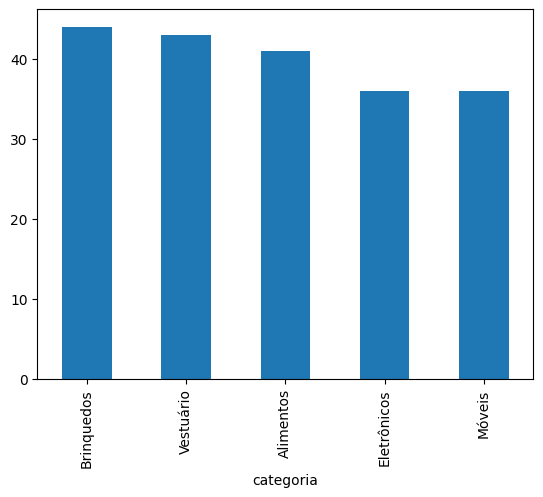

In [ ]:
#gráfico simples de barras
df['categoria'].value_counts().plot(kind='bar')
plt.show()

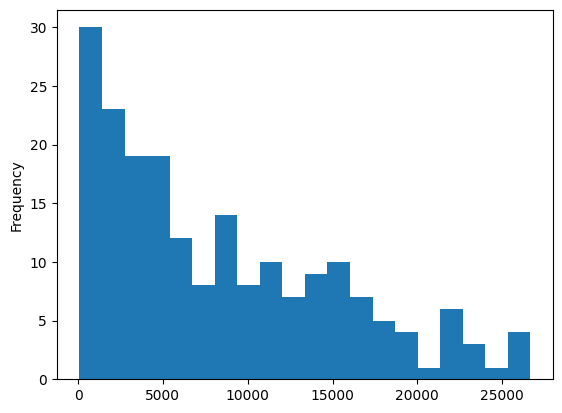

In [ ]:
#histograma de distribuição dos valores de venda 'total_venda'
df['total_venda'].plot(kind='hist', bins =20)
plt.show()

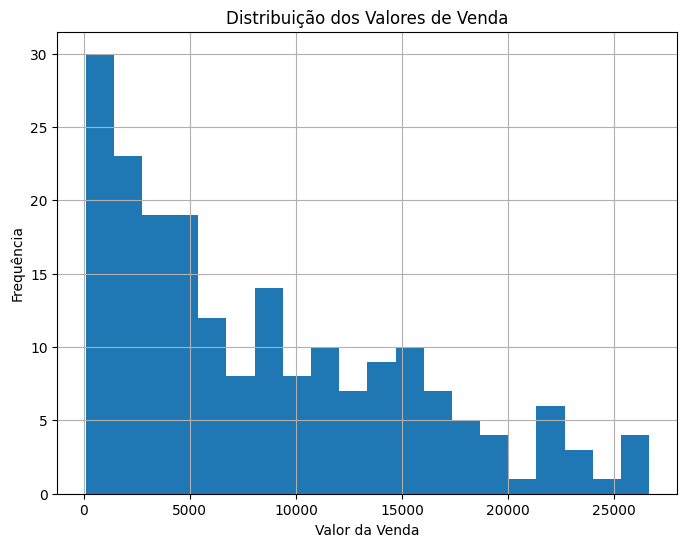

In [ ]:
#histograma versão 2.0
plt.figure(figsize=(8, 6))
df['total_venda'].hist(bins= 20)
edgecolor='black'
plt.xlabel('Valor da Venda')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores de Venda')
plt.show()

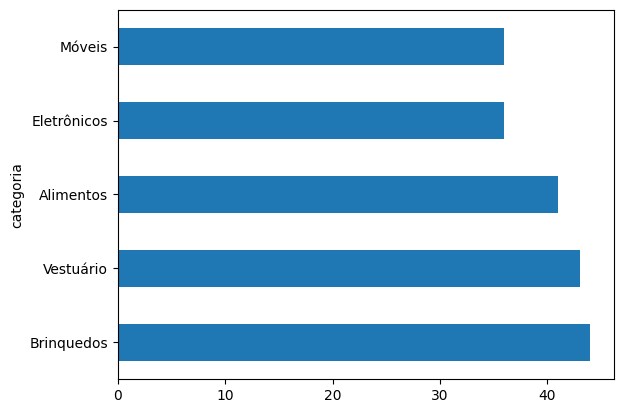

In [ ]:
#gráfico de barras horizontais com o total_venda
df['categoria'].value_counts().plot(kind='barh')
plt.show()

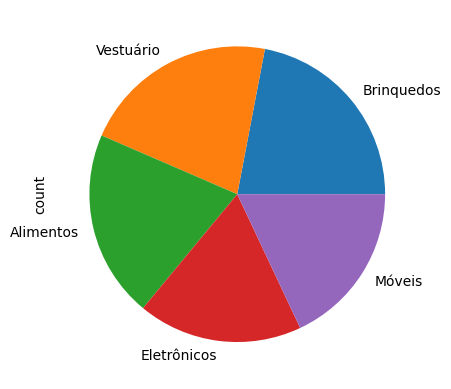

In [ ]:
#gráfico de pizza com o total_venda
df['categoria'].value_counts().plot(kind='pie')
plt.show()

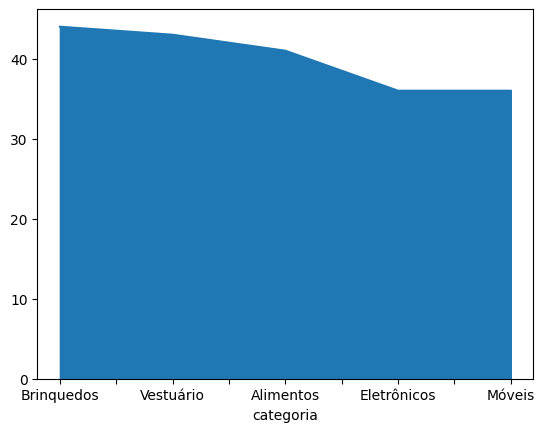

In [ ]:
#gráfico de área com o total_venda
df['categoria'].value_counts().plot(kind='area')
plt.show()

Criar uma nova coluna STATUS DO CLIENTE

In [ ]:
#criar uma coluna Status do cliente
df['Status'] = np.where(df['total_venda'] > 10000, 'VIP', 'Não VIP')

In [ ]:
#visualizar novamente as colunas do data set para verificar se a nova coluna foi criada corretamente
print(df.head())

   data_venda          nome_cliente estado    nome_produto    categoria  \
0  2025-05-11   Dra, Mariana da Paz     BA           Leite    Alimentos   
1  2025-03-14       Marcela Rezende     BA          Feijão    Alimentos   
2  2025-04-18    Srta, Brenda Cunha     BA   Quebra-Cabeça   Brinquedos   
3  2025-02-09  Maria Clara Caldeira     BA  Fone de Ouvido  Eletrônicos   
4  2025-04-10   João Felipe Cardoso     BA        Carrinho   Brinquedos   

   quantidade  preco_unitario  total_venda  quantidade_estoque  \
0           9         1610.73     14496.57                 116   
1           7         2406.94     16848.58                 131   
2           1         2192.52      2192.52                 224   
3           2         2008.93      4017.86                 201   
4           8          624.63      4997.04                 170   

  localizacao_estoque   ano  mes  dia  dia da semana   Status  
0            C3-A2-B2  2025    5   11              1      VIP  
1            B2-A1-C2  2

Trabalhando com datas

In [ ]:
#Garantir que as informações de data estão no formato datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])

In [ ]:
#extrair as informações de data
df['ano'] = df['data_venda'].dt.year
df['mes'] = df['data_venda'].dt.month
df['dia'] = df['data_venda'].dt.day
df['dia da semana'  ] = df['data_venda'].dt.dayofweek

Analise de oportunidades

In [ ]:
#qual o total de vendas?
print(df['total_venda'].sum())

1682529.3800000001


In [ ]:
#qual a media de vendas?
print(df['total_venda'].mean())

8412.6469


In [ ]:
#qual categoria vende mais?
print(df.groupby('categoria')['total_venda'].sum())

categoria
Alimentos      378777.27
Brinquedos     331006.07
Eletrônicos    322217.60
Móveis         286853.41
Vestuário      363675.03
Name: total_venda, dtype: float64


In [ ]:
#maior venda individual
print(df['total_venda'].max())

26662.590000000004


In [ ]:
#dia da semana com a maior venda
print(df.groupby('dia da semana')['total_venda'].sum())

dia da semana
0    204156.36
1    193726.40
2     77299.24
3    237890.78
4    372577.58
5    355882.57
6    240996.45
Name: total_venda, dtype: float64


Analise Final     

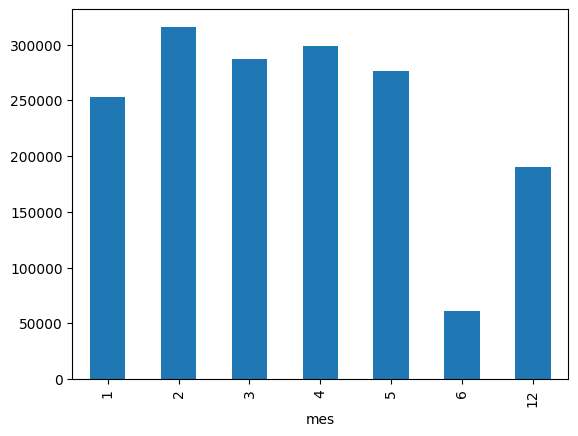

In [ ]:
#gráfico de vendas totais por mes
df.groupby('mes')['total_venda'].sum().plot(kind='bar')
plt.show()

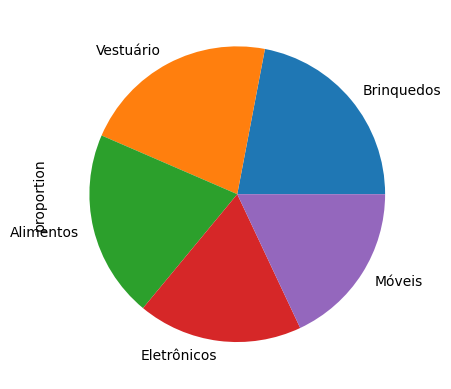

In [ ]:
#grafico de pizza do percentual de vendas por categoria
df['categoria'].value_counts(normalize=True).plot(kind='pie')
plt.show()

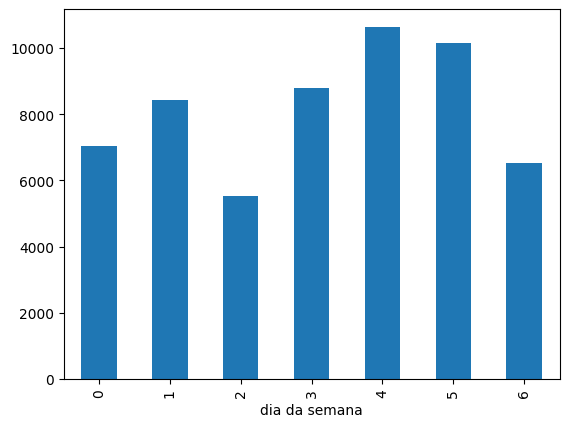

In [ ]:
#grafico de media de vendas em cada dia da semana
df.groupby('dia da semana')['total_venda'].mean().plot(kind='bar')
plt.show()

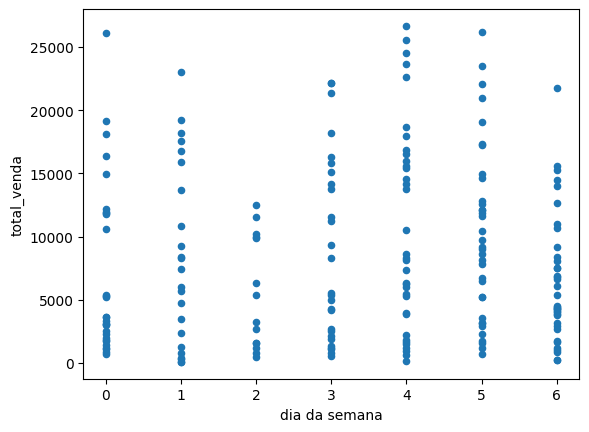

In [ ]:
#gráfico de dispersão do dia da semana com o total de venda
df.plot(x='dia da semana', y='total_venda', kind='scatter')
plt.show()

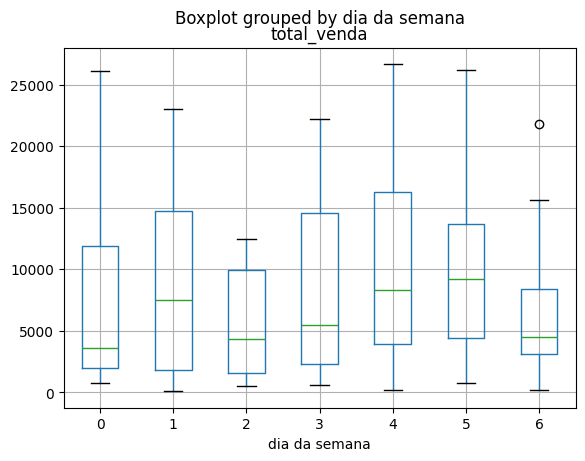

In [ ]:
#boxplot da distribuição de vendas por dia
df.boxplot(column='total_venda', by='dia da semana')
plt.show()

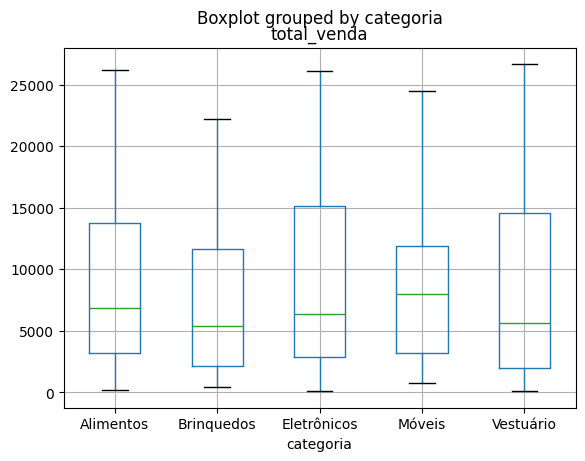

In [ ]:
#boxplot por total de vendas por categoria
df.boxplot(column='total_venda', by='categoria')
plt.show()

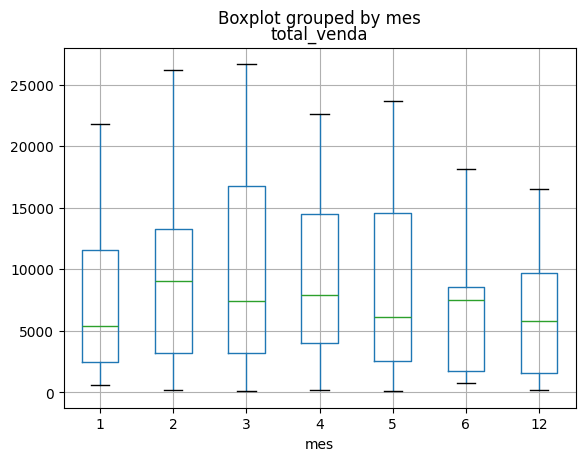

In [ ]:
#boxplot por total de vendas por mes
df.boxplot(column='total_venda', by='mes')
plt.show()

In [ ]:
 #comparando o valor medio de vendas entre vip e não vip
 print(df.groupby('Status')['total_venda'].mean())

Status
Não VIP     3941.469528
VIP        16191.270548
Name: total_venda, dtype: float64


In [ ]:
#comparando o valor total da venda entre vip e não vip
print(df.groupby('Status')['total_venda'].sum())

Status
Não VIP     500566.63
VIP        1181962.75
Name: total_venda, dtype: float64


In [ ]:
#comparando a quantidade vendida entre vip e não vip
print(df.groupby('Status')['quantidade'].sum())

Status
Não VIP    573
VIP        588
Name: quantidade, dtype: int64


In [ ]:
#comparando as compras dos vips e não vips por categoria
print(df.groupby(['Status', 'categoria'])['quantidade'].sum())

Status   categoria  
Não VIP  Alimentos       88
         Brinquedos     143
         Eletrônicos    117
         Móveis          95
         Vestuário      130
VIP      Alimentos      145
         Brinquedos     103
         Eletrônicos    124
         Móveis          98
         Vestuário      118
Name: quantidade, dtype: int64


conclusão da estratégia

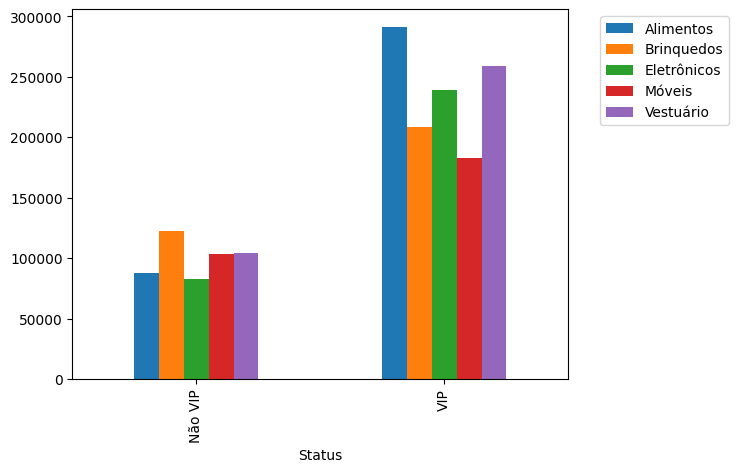

In [ ]:
 #gerar um gráfico de barras comparando as compras dos vips e não vips por categoria
ax = df.groupby(['Status', 'categoria'])['total_venda'].sum().unstack().plot(kind='bar')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()